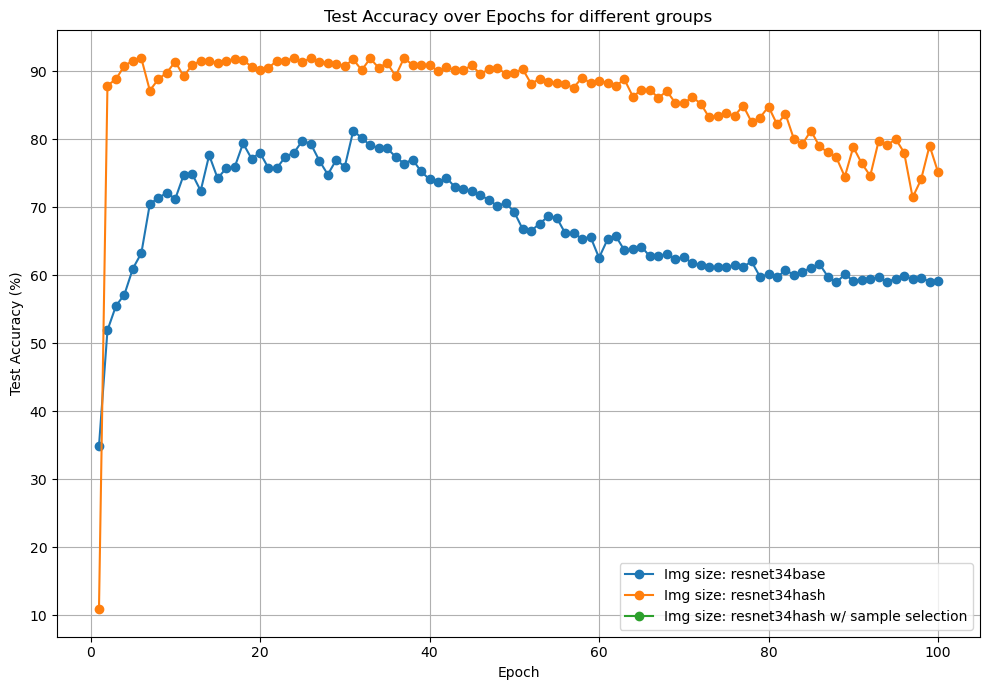

In [4]:
# 绘制对比折线
import matplotlib.pyplot as plt
import re

# 定义读取和解析日志文件的函数
def parse_log_file(log_file_path):
    groups = {
        "resnet34base": [],
        "resnet34hash": [],
        "resnet34hash w/ sample selection": [],
    
    }
    
    # 读取日志文件
    with open(log_file_path, 'r') as file:
        log_content = file.readlines()
    
    current_group = None
    
    # 解析日志内容
    for line in log_content:
        if "Started Training with: " in line:
            current_group = line.split(": ")[-1].strip()
        elif "Test Accuracy:" in line:
            accuracy = float(line.split(": ")[-1].rstrip('%\n'))
            if current_group in groups:
                groups[current_group].append(accuracy)
    
    return groups

# 绘制准确率折线图的函数
def plot_accuracies(groups):
    plt.figure(figsize=(10, 7))
    for group, accuracies in groups.items():
        epochs = range(1, len(accuracies) + 1)
        plt.plot(epochs, accuracies, marker='o', linestyle='-', label=f'Img size: {group}')
    
    plt.title('Test Accuracy over Epochs for different groups')
    plt.xlabel('Epoch')
    plt.ylabel('Test Accuracy (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # 显示图表
    plt.show()

# 指定日志文件路径
log_file_path = './base_hash_labelrefurb.log'

# 解析日志文件
groups = parse_log_file(log_file_path)

# 绘制准确率折线图
plot_accuracies(groups)
